#CHE1147H - Data Mining in Engineering

#Programming assignment - 4

#Student name: **Ashutosh Desai**

#Student number: **1004774041**

###**2.1 Build a Batch Statistical Process Control model**

In [ ]:
#1.
baker = pd.read_excel('bakers_yeast_reference_batches.xlsx')
baker  

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


In [ ]:
data_per_batch = baker.groupby('BatchID').agg(['sum','count'])
data_per_batch

Unnamed: 0       Primary ID        ...      Level               pH      
               sum count        sum count  ...        sum count        sum count
BatchID                                    ...                                  
Ma          148072    83     148155    83  ...  4032.9381    83  416.63077    83
Na          154961    83     155044    83  ...  4158.5755    83  436.25334    83
Ta          189406    83     189489    83  ...  4126.6691    83  434.09237    83
Va          203184    83     203267    83  ...  4203.5614    83  438.88442    83
Xa          210073    83     210156    83  ...  4052.2888    83  445.82997    83
bb           24070    83      24153    83  ...  4218.0350    83  441.86843    83
cb           37848    83      37931    83  ...  4029.8568    83  434.96943    83
db           51626    83      51709    83  ...  3991.2975    83  436.03199    83
eb           58515    83      58598    83  ...  4011.8051    83  435.14768    83
fb           65404    83      65487    83  ...  3777.6394    83  431.81583    83
gb           79182    83      79265    83  ...  4125.5322    83  436.60912    83
hb           92960    83      93043    83  ...  4019.8581    83  432.35961    83
ib          106738    83     106821    83  ...  3978.4301    83  434.76815    83
jb          120516    83     120599    83  ...  3961.2305    83  434.97336    83
kb          127405    83     127488    83  ...  3923.1117    83  435.65017    83
lb          141183    83     141266    83  ...  3895.9927    83  432.84150    83

[16 rows x 20 columns]

In [ ]:
print('Number of batches in the data = ',data_per_batch.shape[0])

Number of batches in the data =  16


Duration of each batch = **567.1667**

Data points per batch = **83**

In [ ]:
variables = baker.columns

In [ ]:
print('Number of variables (including time) = ',len(variables[3:]))

Number of variables (including time) =  8


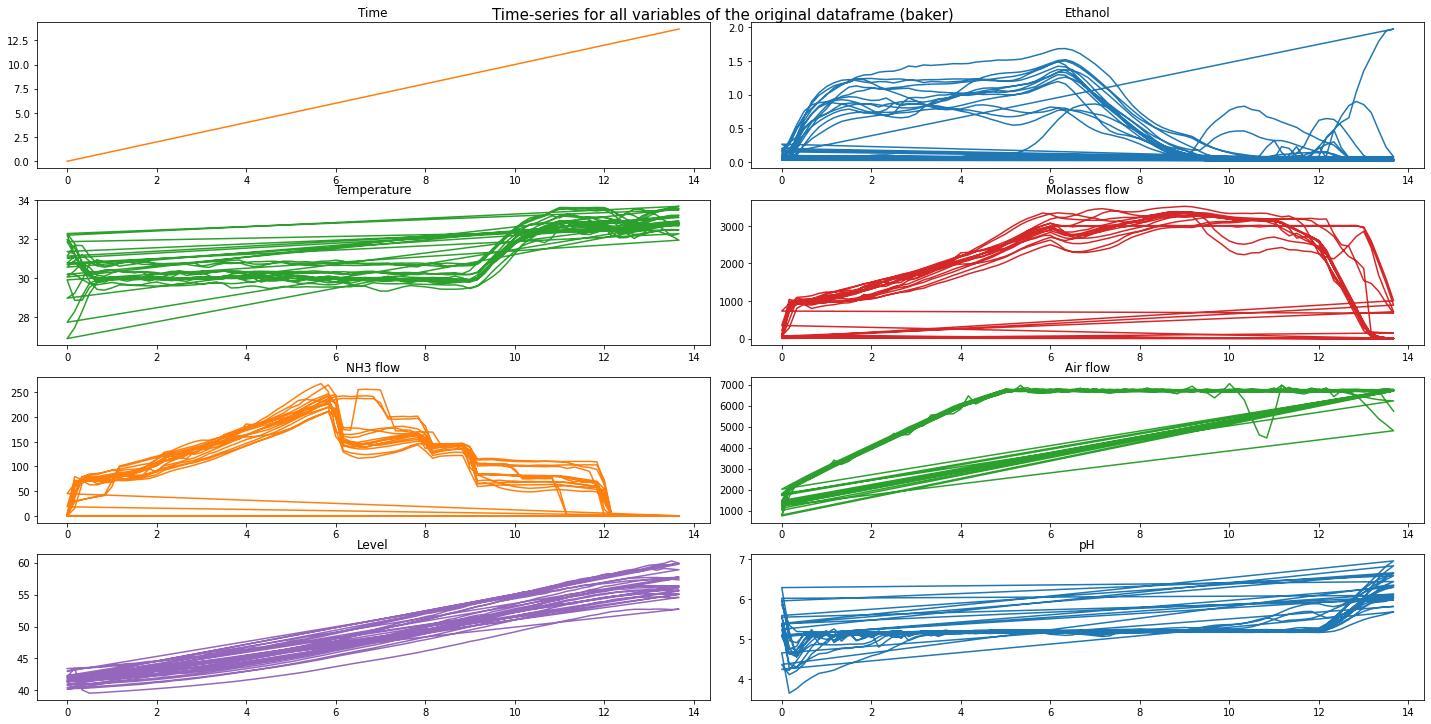

In [ ]:
#2.
fig, axs = plt.subplots(4,2,figsize=(20,10))
fig.tight_layout()
fig.suptitle('Time-series for all variables of the original dataframe (baker)',y=1, fontsize=15)
axs[0,0].plot(baker['Time'],baker['Time'],'tab:orange')
axs[0,0].set_title('Time')
axs[0,1].plot(baker['Time'],baker['Ethanol'],'tab:blue')
axs[0,1].set_title('Ethanol')
axs[1,0].plot(baker['Time'],baker['Temperature'],'tab:green')
axs[1,0].set_title('Temperature')
axs[1,1].plot(baker['Time'],baker['Molasses flow'],'tab:red')
axs[1,1].set_title('Molasses flow')
axs[2,0].plot(baker['Time'],baker['NH3 flow'],'tab:orange')
axs[2,0].set_title('NH3 flow')
axs[2,1].plot(baker['Time'],baker['Air flow'],'tab:green')
axs[2,1].set_title('Air flow')
axs[3,0].plot(baker['Time'],baker['Level'],'tab:purple')
axs[3,0].set_title('Level')
axs[3,1].plot(baker['Time'],baker['pH'],'tab:blue')
axs[3,1].set_title('pH')
plt.savefig('Fig.2.1.2_a_Desai_Ashutosh.png')

The question about the varability of variables is explained in the next section with a scaled subplot.

In [ ]:
#3.
#Pre-process data
baker_modified = baker.drop(columns=['Unnamed: 0','Primary ID'])
baker_modified['Time_index'] = baker['Time']
baker_modified.set_index(['BatchID', 'Time_index'],inplace=True)

In [ ]:
#Standardization of data
baker_scaled = StandardScaler().fit_transform(baker_modified)

In [ ]:
baker_scaled

array([[-1.71130681, -1.04011805,  0.84597751, ..., -3.10825991,
        -0.96636672,  1.90190383],
       [-1.66956753, -1.042825  ,  0.50253889, ..., -2.61974424,
        -0.954013  ,  0.32731927],
       [-1.62782851, -1.04192268, -0.06621858, ..., -2.49309872,
        -0.93948474, -0.16307905],
       ...,
       [ 1.62781988, -1.13278386,  1.53606669, ...,  0.61527817,
         1.63473666,  3.32033889],
       [ 1.66956742, -1.13276288,  1.54361479, ...,  0.24514353,
         1.65241428,  3.40421753],
       [ 1.71131495, -1.13269993,  1.54787064, ..., -0.07730339,
         1.63473666,  3.3977962 ]])

In [ ]:
baker_scaled_df = pd.DataFrame(baker_scaled,columns=['Time','Ethanol','Temperature','Molasses flow','NH3 flow','Air flow','Level','pH'])

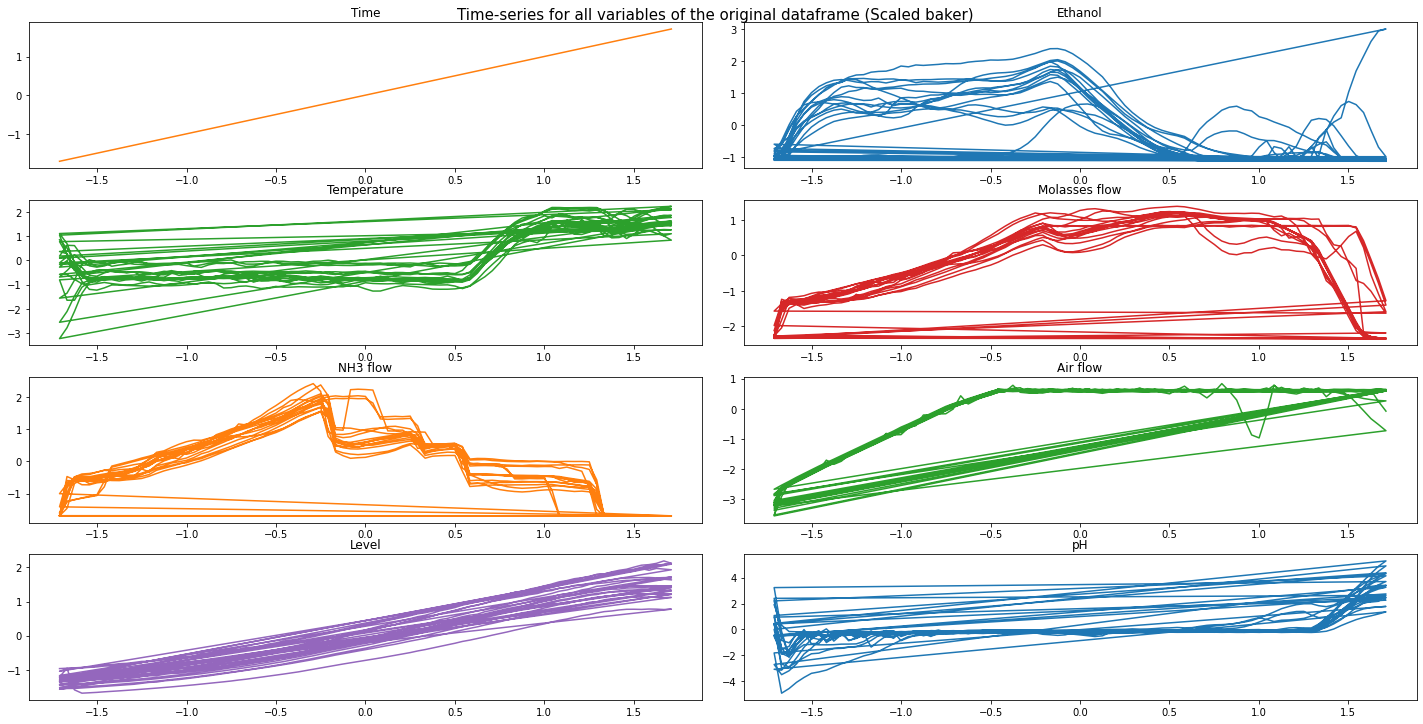

In [ ]:
#scaled plot to check variablity of variables
fig, axs = plt.subplots(4,2,figsize=(20,10))
fig.tight_layout()
fig.suptitle('Time-series for all variables of the original dataframe (Scaled baker)',y=1, fontsize=15)
axs[0,0].plot(baker_scaled_df['Time'],baker_scaled_df['Time'],'tab:orange')
axs[0,0].set_title('Time')
axs[0,1].plot(baker_scaled_df['Time'],baker_scaled_df['Ethanol'],'tab:blue')
axs[0,1].set_title('Ethanol')
axs[1,0].plot(baker_scaled_df['Time'],baker_scaled_df['Temperature'],'tab:green')
axs[1,0].set_title('Temperature')
axs[1,1].plot(baker_scaled_df['Time'],baker_scaled_df['Molasses flow'],'tab:red')
axs[1,1].set_title('Molasses flow')
axs[2,0].plot(baker_scaled_df['Time'],baker_scaled_df['NH3 flow'],'tab:orange')
axs[2,0].set_title('NH3 flow')
axs[2,1].plot(baker_scaled_df['Time'],baker_scaled_df['Air flow'],'tab:green')
axs[2,1].set_title('Air flow')
axs[3,0].plot(baker_scaled_df['Time'],baker_scaled_df['Level'],'tab:purple')
axs[3,0].set_title('Level')
axs[3,1].plot(baker_scaled_df['Time'],baker_scaled_df['pH'],'tab:blue')
axs[3,1].set_title('pH')
plt.savefig('Fig.2.1.2_b_Desai_Ashutosh.png')

**The scaled plot tells us that 'pH' and 'Temperature' have the highest variability. Whereas, 'Level' and 'Air flow' are tightly controlled.**

Outliers:
1. Ethanol plot has an outlier which shows high content at the end of the timeline.

2. Temperature plot shows values far away from mean during the 1st half of the timeline.

3. pH plot shows values far away from mean during the 1st half of the timeline.

In [ ]:
#PCA
pca = PCA(n_components=5, svd_solver='full')
pca_baker = pca.fit(baker_scaled)

In [ ]:
#Finding scores.
scores_baker = pca_baker.transform(baker_scaled)

scores_baker_df = pd.DataFrame(data = scores_baker
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = baker_modified.index)

scores_baker_df

PC1       PC2       PC3       PC4       PC5
BatchID Time_index                                                  
bb      0.000000   -0.808176  4.508288 -0.200368  1.295502 -0.754945
        0.166667   -1.303347  3.391210  0.824346  0.666865 -0.552935
        0.333333   -1.630004  3.073121  1.085677  0.706676 -0.168488
        0.500000   -1.790453  2.816650  1.059588  0.979711  0.160562
        0.666667   -1.811100  2.636318  1.033483  1.094550  0.294213
...                      ...       ...       ...       ...       ...
Xa      13.000000   3.772295  2.368292 -1.644665  0.830572 -0.163892
        13.166700   3.875235  2.595895 -1.942104  0.980115 -0.265168
        13.333300   3.963794  2.665704 -2.074648  1.041445 -0.323446
        13.500000   3.900935  2.872436 -2.046092  1.108283 -0.312934
        13.666700   3.808085  3.028983 -1.966617  1.124243 -0.300219

[1328 rows x 5 columns]

In [ ]:
#Finding loadings.
loadings_baker = pca_baker.components_.T

loadings_baker_df = pd.DataFrame(data = loadings_baker
                           ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                           ,index = baker_modified.columns)

loadings_baker_df

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [ ]:
#4.
scores_baker_pivoted = scores_baker_df.pivot_table(index = ['Time_index'], columns = 'BatchID')  
scores_baker_pivoted

PC1                      ...       PC5                    
BatchID           Ma        Na        Ta  ...        jb        kb        lb
Time_index                                ...                              
0.000000   -2.575226 -2.494768 -1.834810  ...  1.438659  1.833015 -0.111854
0.166667   -3.406333 -2.944182 -2.731785  ...  0.774914  1.236314 -0.332924
0.333333   -3.390333 -3.070940 -3.117042  ...  0.456887  0.850361 -0.270976
0.500000   -3.534499 -2.888284 -3.194946  ...  0.199308  0.471139 -0.038183
0.666667   -3.596972 -2.732277 -3.165646  ...  0.218693  0.224946  0.038438
...              ...       ...       ...  ...       ...       ...       ...
13.000000   2.489762  4.277071  3.184812  ... -0.126855 -0.147775 -0.175886
13.166700   2.481818  4.552587  3.157697  ... -0.242682 -0.292980 -0.289735
13.333300   2.421492  4.641010  3.372776  ... -0.286531 -0.326307 -0.334636
13.500000   2.397535  4.702980  3.579729  ... -0.338967 -0.322784 -0.355440
13.666700   2.442108  4.826890  3.850841  ... -0.322251 -0.327004 -0.367125

[83 rows x 80 columns]

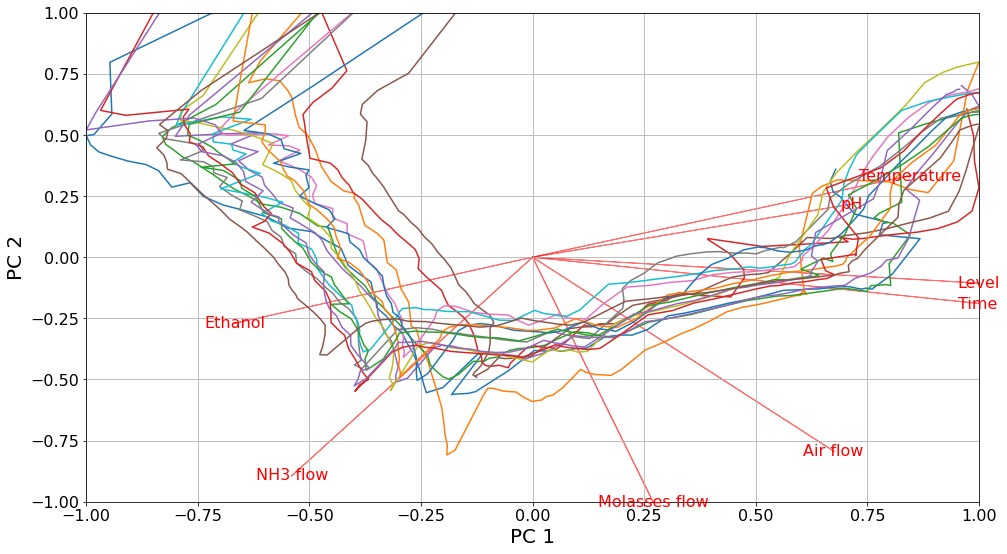

In [ ]:
#5.
plt.figure(figsize=(16,9))
#Calling the function for loadings plot
myplot(loadings_baker_df,loading_labels=loadings_baker_df.index)

# Plot of scores per batch after adjusting them to fit in (-1,1)
scores_baker_pivoted_plot = scores_baker_pivoted.iloc[:,:32]
x = scores_baker_pivoted_plot.PC1
y = scores_baker_pivoted_plot.PC2
x_scaled = MaxAbsScaler().fit_transform(x)
y_scaled = MaxAbsScaler().fit_transform(y)

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x_scaled, y_scaled) 
plt.savefig('Fig.2.1.5_Desai_Ashutosh.png')

6.)


The graph shown above represents the scores and loadings in terms of PC1 and PC2. The loadings are shown in red arrows as they signify direction of variables. The combination of individual percentage contributions of all variables, PC1 and PC2 are formed. The scores are shown as solid lines of different colors. Firstly, there are lines and not points because they represent continuous time series. Secondly, each line represents a batch and thus, there are 16 lines. 

The batches start Quarter-2 and end in Quarter-1.

If we observe carefully, there are two kinks - one in quarter-2 and the other in quarter-3. The one in quarter-3 is a significant one and it is a split between two phases. Phase-1 is a band of lines running from quarter-2 towards the south-east direction. Whereas, Phase-2 is a band of lines running from quarter-3 towards the north-east direction. This change of direction of lines happens due to the change of variables. If we observe the behaviour of 'Ethanol' variable over time (in the subplots shoem above), it has an approximate contstant value during Phase-1 till it reaches mean time value. This is important because in the score-loadings graph the Phase-1 lines are running perpendicular to the 'Ethanol' variable red arrow. However, after the kink, the band of lines are parallel to the 'Ethanol' arrow going in the opposite direection. This matches the 'Ethanol' behaviour in the subplots, where after the mean-time, it drops steeply. 'Molasses flow' is gradually increasing in Phase-1 and remains constant in Phase-2.

'Ethanol', 'pH', and 'Temperature' do not change in first phase. 'Molasses flow' and 'Air flow' do not change in second phase.

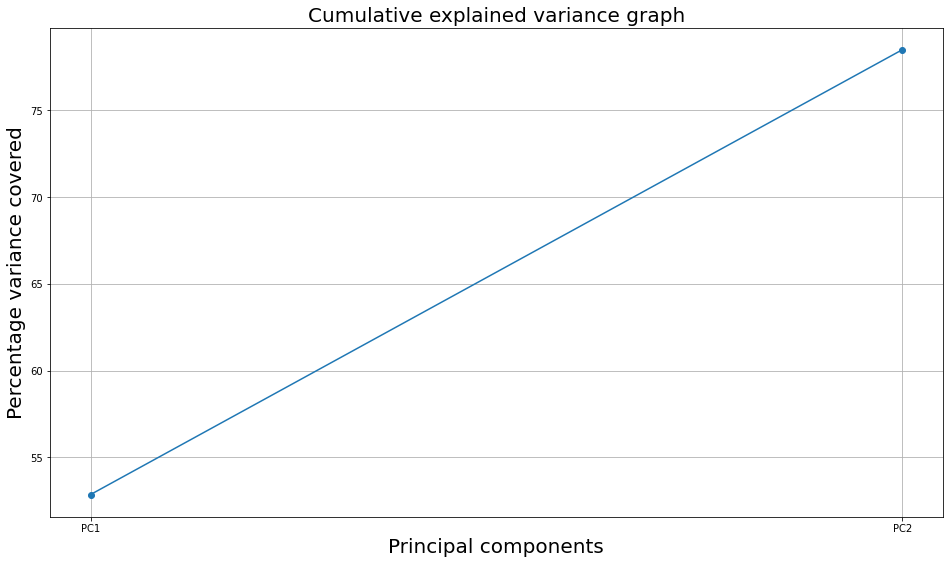

In [ ]:
#7.
#Cumulative explained variance graph
x = ['PC1','PC2']
plt.figure(figsize=(16,9))
plt.plot(x,np.cumsum(pca_baker.explained_variance_ratio_[:2]*100),'-o')
plt.title('Cumulative explained variance graph',fontsize=20)
plt.xlabel('Principal components',fontsize=20)
plt.ylabel('Percentage variance covered',fontsize=20)
plt.grid()
plt.savefig('Fig.2.1.7_Desai_Ashutosh.png')

In [ ]:
print('% variance captured by first two principal components = ',np.sum(pca_baker.explained_variance_ratio_[:2]*100))

% variance captured by first two principal components =  78.46737653782884


###**2.2 Use the model to monitor running batches**

In [ ]:
#1.a.
today_batch = pd.read_excel('todays_batches.xlsx')
today_batch

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [ ]:
#1.b.
#Pre-process
today_batch_clean = today_batch.drop(columns=['Unnamed: 0','Primary ID'])
today_batch_clean['Time_index'] = today_batch['Time']
today_batch_clean.set_index(['BatchID', 'Time_index'],inplace=True)

In [ ]:
today_batch_clean

Time  Ethanol  Temperature  ...  Air flow    Level       pH
BatchID Time_index                                   ...                            
Ya      0.000000     0.000000  0.30350      29.0885  ...   1250.69  41.9216  4.86282
        0.166667     0.166667  0.41224      29.5509  ...   2040.08  41.9911  4.00324
        0.333333     0.333333  1.16614      29.9639  ...   2235.08  42.3624  4.05839
        0.500000     0.500000  2.22696      29.9746  ...   2419.08  42.8531  4.35465
        0.666667     0.666667  3.13590      29.9466  ...   2603.53  43.2146  4.76967
...                       ...      ...          ...  ...       ...      ...      ...
Za      13.000000   13.000000  0.01637      33.2882  ...   6794.76  57.2191  6.38039
        13.166700   13.166700  0.01575      33.3834  ...   6820.50  57.2289  6.48979
        13.333300   13.333300  0.01512      33.4438  ...   6698.80  57.2021  6.55989
        13.500000   13.500000  0.01444      33.4531  ...   6775.14  57.0425  6.59559
        13.666700   13.666700  0.01386      33.4518  ...   6749.58  57.2048  6.61546

[166 rows x 8 columns]

In [ ]:
#1.c
#Standardization of data
today_batch_scaled = StandardScaler().fit_transform(today_batch_clean)

In [ ]:
today_batch_scaled

array([[-1.71130681, -0.93764473, -1.58215308, ..., -2.85816559,
        -1.52221206, -0.94629827],
       [-1.66956753, -0.90259207, -1.21393828, ..., -2.42978076,
        -1.50554562, -3.35993825],
       [-1.62782851, -0.65957014, -0.8850613 , ..., -2.32395849,
        -1.41650606, -3.20508094],
       ...,
       [ 1.62781988, -1.03060489,  1.88602585, ...,  0.09840552,
         2.14212646,  3.81895453],
       [ 1.66956742, -1.03082409,  1.89343156, ...,  0.13983359,
         2.1038536 ,  3.91919761],
       [ 1.71131495, -1.03101106,  1.89239635, ...,  0.12596273,
         2.14277393,  3.97499117]])

In [ ]:
#1.d.
#PCA
#Finding scores.
scores_today_batch = pca_baker.transform(today_batch_scaled)

scores_today_batch_df = pd.DataFrame(data = scores_today_batch
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = today_batch_clean.index)

scores_today_batch_df

PC1       PC2       PC3       PC4       PC5
BatchID Time_index                                                  
Ya      0.000000   -2.940228  2.788047  1.543787  1.079616  0.794386
        0.166667   -3.455345  2.326521  2.912030 -0.455488  0.646426
        0.333333   -3.252958  2.312443  2.655682 -0.707357  0.510623
        0.500000   -3.186120  0.775772  2.184541 -0.176226 -0.024210
        0.666667   -2.820497  1.141517  1.122811  0.253313  0.025144
...                      ...       ...       ...       ...       ...
Za      13.000000   4.123385  1.810647 -1.529059  0.960293 -0.305053
        13.166700   4.265830  1.935516 -1.768853  1.082209 -0.390455
        13.333300   4.336795  2.048642 -1.903776  1.164838 -0.440003
        13.500000   4.386626  2.048774 -1.985723  1.206895 -0.455038
        13.666700   4.437877  2.059891 -2.019775  1.233805 -0.442382

[166 rows x 5 columns]

In [ ]:
#Finding loadings.
loadings_today_batch = pca_baker.components_.T

loadings_today_batch_df = pd.DataFrame(data = loadings_baker
                           ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                           ,index = today_batch_clean.columns)

loadings_today_batch_df

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [ ]:
#1.e.
#Pivoting
scores_today_batch_pivoted = scores_today_batch_df.pivot_table(index = ['Time_index'], columns = 'BatchID')  
scores_today_batch_pivoted

PC1                 PC2  ...       PC4       PC5          
BatchID           Ya        Za        Ya  ...        Za        Ya        Za
Time_index                                ...                              
0.000000   -2.940228 -0.731137  2.788047  ...  2.959827  0.794386 -0.082953
0.166667   -3.455345 -2.071795  2.326521  ...  1.794902  0.646426 -0.159038
0.333333   -3.252958 -2.624304  2.312443  ...  0.590725  0.510623 -0.357611
0.500000   -3.186120 -2.284932  0.775772  ...  0.444486 -0.024210 -0.618796
0.666667   -2.820497 -2.005766  1.141517  ...  0.725349  0.025144 -0.506799
...              ...       ...       ...  ...       ...       ...       ...
13.000000   2.218472  4.123385  1.034385  ...  0.960293  0.047121 -0.305053
13.166700   2.268535  4.265830  1.039046  ...  1.082209  0.094985 -0.390455
13.333300   2.331512  4.336795  1.056795  ...  1.164838  0.112967 -0.440003
13.500000   2.351618  4.386626  1.237855  ...  1.206895  0.074865 -0.455038
13.666700   2.080129  4.437877  1.786488  ...  1.233805  0.141692 -0.442382

[83 rows x 10 columns]

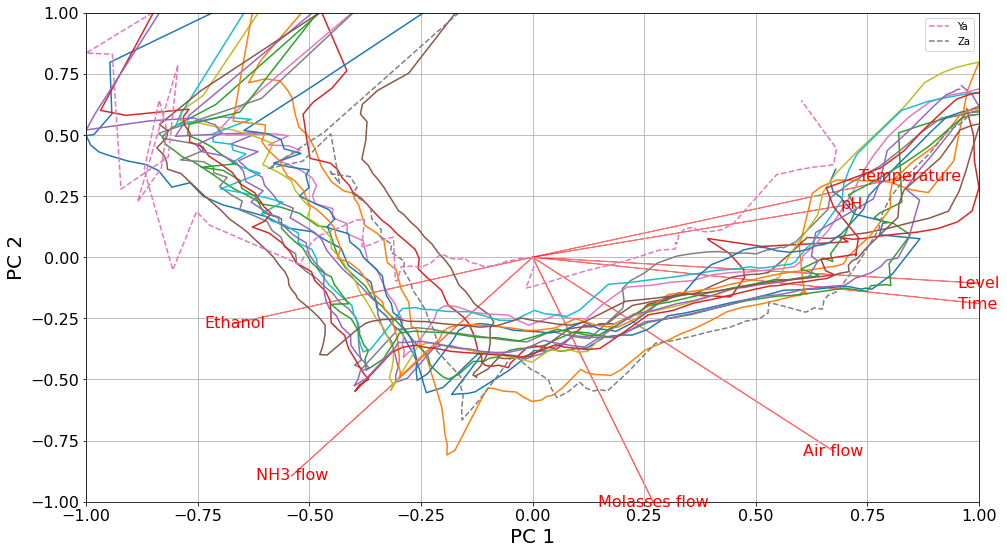

In [ ]:
#2.
#Calling the function for loadings plot
myplot(loadings_baker_df,loading_labels=loadings_baker_df.index)


# Plot of scores per batch after adjusting them to fit in (-1,1)
scores_baker_pivoted_plot = scores_baker_pivoted.iloc[:,:32]
x = scores_baker_pivoted_plot.PC1
y = scores_baker_pivoted_plot.PC2
x_scaled = MaxAbsScaler().fit_transform(x)
y_scaled = MaxAbsScaler().fit_transform(y)

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x_scaled, y_scaled) 


# Plot of scores of 2 batches (Ya & Za) after adjusting them to fit in (-1,1) - New model
labels = ['Ya','Za']
scores_today_batch_pivoted_plot = scores_today_batch_pivoted.iloc[:,:4]

x = scores_today_batch_pivoted_plot.PC1
y = scores_today_batch_pivoted_plot.PC2
x_scaled = MaxAbsScaler().fit_transform(x)
y_scaled = MaxAbsScaler().fit_transform(y)
plt.rcParams["figure.figsize"] = [16,9]

for i in range(0,2):
  plt.plot(x_scaled[:,i], y_scaled[:,i],'--',label=labels[i])

plt.legend()
plt.savefig('Fig.2.2.2_Desai_Ashutosh.png')

3.)

**Yes, the batches Ya and Za show similar behaviour to that of the reference batches.**There no SIGNIFICANT outliers indicating potential problems.